# Install Packages

In [1]:
!pip install tensorflow
!pip install opencv-python

# Step-1 : Import Packages

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Step-2 : Load Cifar10 Dataset

In [3]:
from keras import datasets

In [4]:
datasets.cifar10.load_data

<function keras.src.datasets.cifar10.load_data()>

In [5]:
datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [6]:
len(datasets.cifar10.load_data())   # ((a,b),(c,d))

2

In [7]:
type(datasets.cifar10.load_data())

tuple

In [8]:
len(datasets.cifar10.load_data()[0])  # (a,b)

2

In [9]:
type(datasets.cifar10.load_data()[0])

tuple

In [10]:
len(datasets.cifar10.load_data()[0][0])  # a

50000

In [11]:
((X_train,y_train),(X_test,y_test)) = datasets.cifar10.load_data()

# Step-3 : Understand the data

In [12]:
len(X_train),len(y_train),len(X_test),len(y_test)

(50000, 50000, 10000, 10000)

In [13]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [14]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_train[0].shape

(32, 32, 3)

In [16]:
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape,y_test.shape

((50000,), (10000,))

In [17]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [18]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

# Step-4 : Plot the image

In [19]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

Text(0.5, 1.0, 'frog')

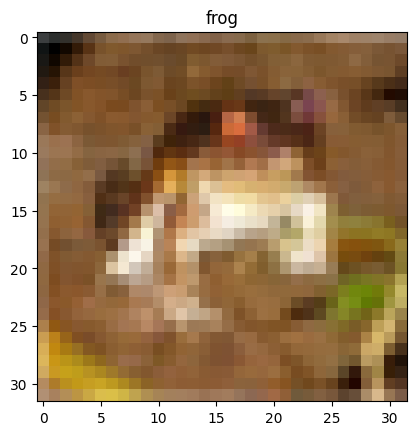

In [20]:
plt.imshow(X_train[0])
plt.title(class_names[y_train[0]])

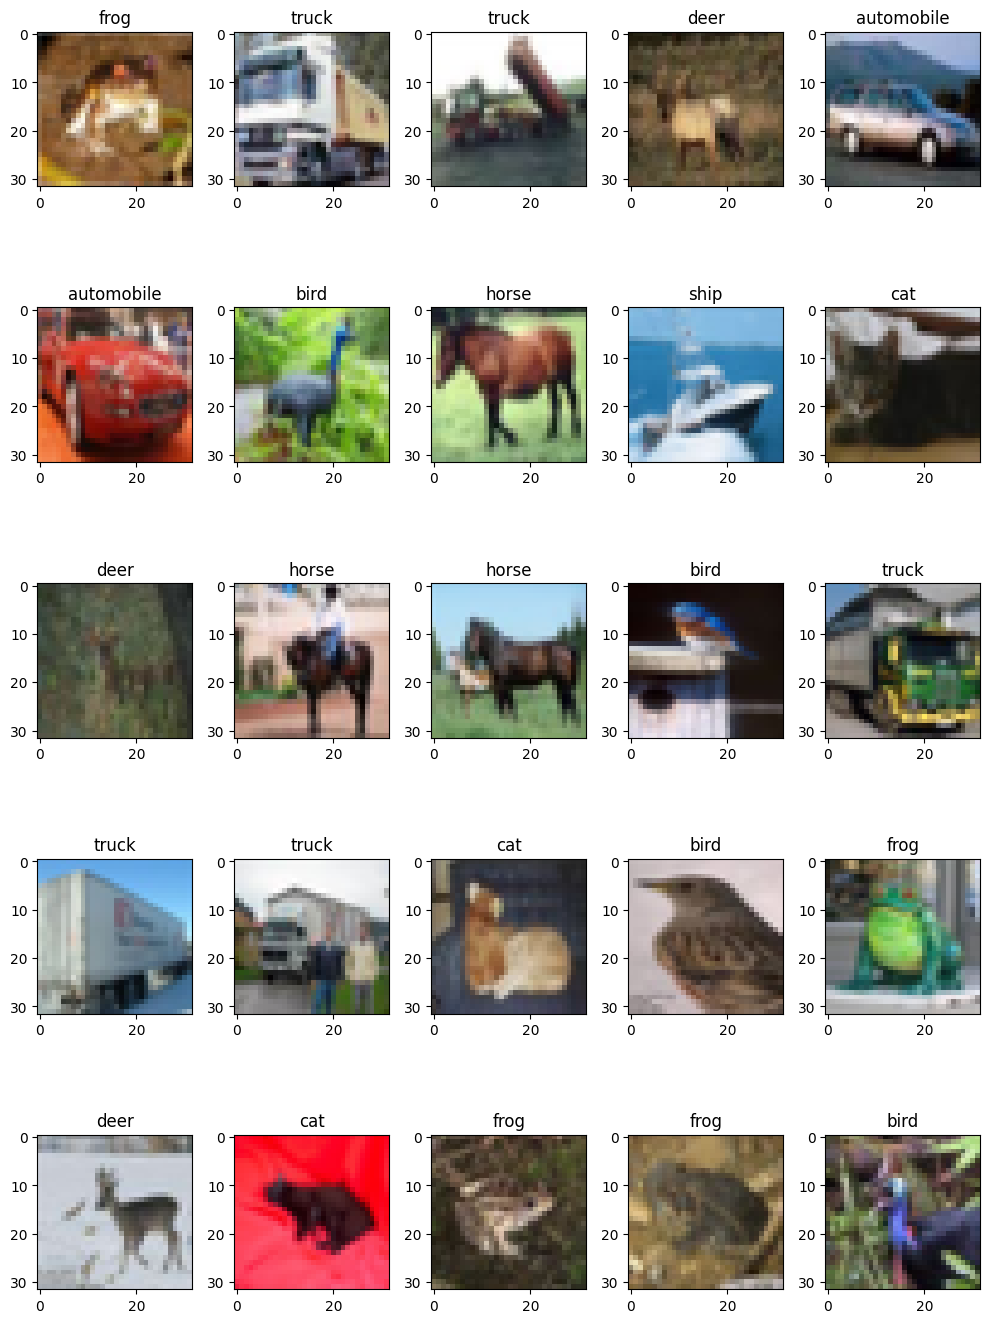

In [21]:
plt.figure(figsize=(10,14))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

# Step-5 : Normalize the data

- The values are ranges from 0 to 255

- we need to convert into 0 to 1

In [22]:
X_train = X_train/255
X_test = X_test/255

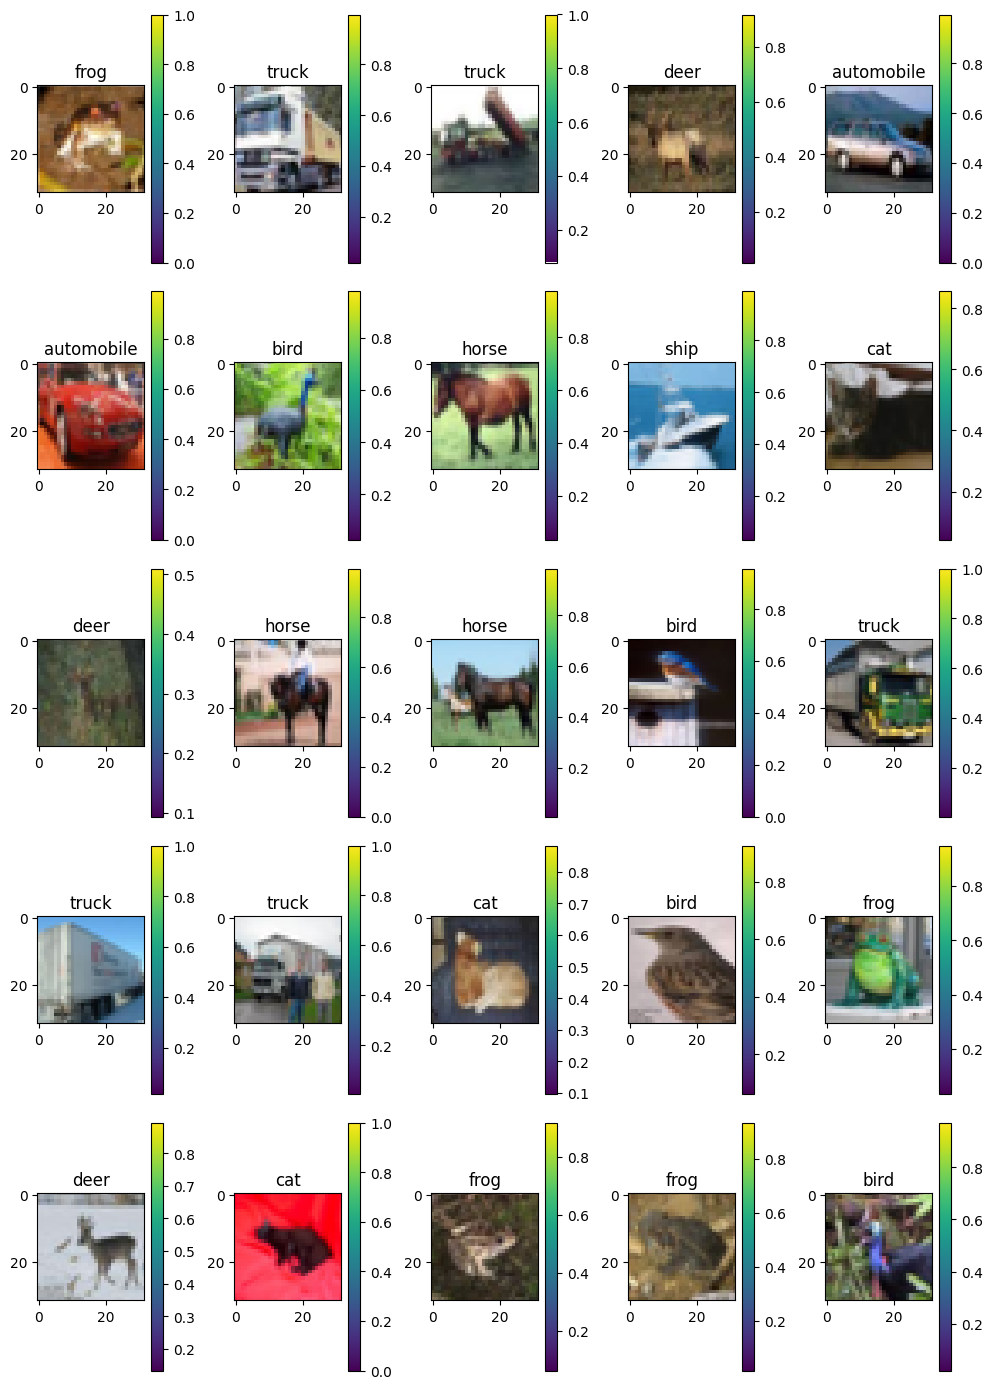

In [23]:
plt.figure(figsize=(10,14))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.colorbar()
  plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [24]:
X_train = X_train*255
X_test = X_test*255

In [25]:
from google.colab.patches import cv2_imshow

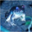

In [26]:
cv2_imshow(X_train[0])

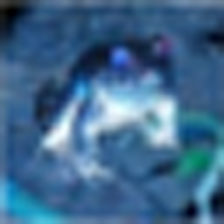

In [27]:
img = X_train[0]
resized_img = cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_img)

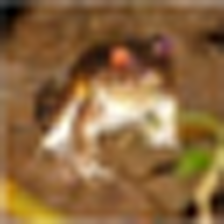

In [28]:
img = X_train[0]
resized_img = cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
# Convert to uint8 (0–255), then RGB → BGR
resized_img_uint8 = np.clip(resized_img, 0, 255).astype('uint8')
resized_img_bgr = cv2.cvtColor(resized_img_uint8, cv2.COLOR_RGB2BGR)

cv2_imshow(resized_img_bgr)

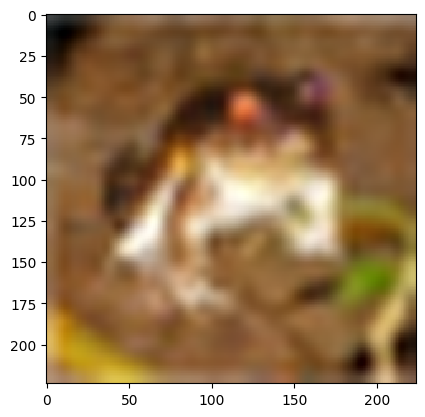

In [29]:
img = X_train[0]/255
resized_img = cv2.resize(img,(224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_img,interpolation='nearest')
plt.show()

# Step-6 : CNN Network

**conv2D** : Images Height,width,channel

**conv3D** : videos  frames,height,width,channel

##### Created Convolution layer

In [30]:
from tensorflow.keras import datasets,layers,models
model = models.Sequential()

#########################################################################
model.add(layers.Conv2D(32, # filters
                        (3,3), # filter size/kernel size
                        activation='relu',
                        input_shape=(32,32,3)
                        ))  # Stride / padding : default

model.add(layers.Conv2D(32, # filters
                        (3,3), # filter size/kernel size
                        activation='relu'))  # Stride / padding : default

model.add(layers.MaxPool2D((2,2)))   # Shape of the pool

#########################################################################
model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernel size
                        activation='relu'))  # Stride / padding : default

model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernel size
                        activation='relu'))  # Stride / padding : default

model.add(layers.MaxPool2D((2,2)))   # Shape of the pool

########################################################################
model.add(layers.Conv2D(64, # filters
                        (3,3), # filter size/kernel size
                        activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Adding Neural Network Dense layers

In [31]:
from tensorflow.keras.initializers import GlorotUniform   # Xavier = Glorot

model.add(layers.Flatten())  # After convolution === Fully connect layer
# no need of input shape here

model.add(layers.Dense(64,
                       kernel_initializer=GlorotUniform()))  # Hidden layer 64 neurons
model.add(layers.BatchNormalization())     # batch normalization
model.add(layers.Activation('relu'))       # relu activation function
model.add(layers.Dropout(0.2))              # Dropout layer

model.add(layers.Dense(32,
                       kernel_initializer=GlorotUniform()))  # Hidden layer 32 neurons
model.add(layers.BatchNormalization())     # batch normalization
model.add(layers.Activation('relu'))       # relu activation function
model.add(layers.Dropout(0.2))              # Dropout layer

model.add(layers.Dense(10,
                       kernel_initializer=GlorotUniform(),
                       activation='softmax')) # 10 classes so 10 neurons and softmax activation

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,218 (555.54 KB)

 Trainable params: 142,026 (554.79 KB)

 Non-trainable params: 192 (768.00 B)

# Step-7 : Compile

In [33]:
from re import VERBOSE
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Step-8 : Train model on train data and also giving valadation split(0.2)

- validation split=0.2 means
    - model will train on 80% data of X_train and y_train
    - Other 20% will use to test our model means validation of our model

In [34]:
X_train = X_train/255
X_test = X_test/255

In [35]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2796 - loss: 2.0083 - val_accuracy: 0.4842 - val_loss: 1.4234
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5106 - loss: 1.3878 - val_accuracy: 0.4682 - val_loss: 1.5482
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5772 - loss: 1.1934 - val_accuracy: 0.5993 - val_loss: 1.1263
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6229 - loss: 1.0763 - val_accuracy: 0.5804 - val_loss: 1.1808
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6590 - loss: 0.9852 - val_accuracy: 0.6426 - val_loss: 1.0011
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6836 - loss: 0.9237 - val_accuracy: 0.6947 - val_loss: 0.8450
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6970 - loss: 0.8759 - val_accuracy: 0.6972 - val_loss: 0.8570
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7145 - loss: 0.83

In [36]:
history.history

{'accuracy': [0.3675999939441681,
  0.5259749889373779,
  0.5887249708175659,
  0.6317750215530396,
  0.6623499989509583,
  0.68545001745224,
  0.6989250183105469,
  0.713824987411499,
  0.7298750281333923,
  0.7369250059127808,
  0.7500749826431274,
  0.7615249752998352,
  0.7705249786376953,
  0.7783750295639038,
  0.7867749929428101,
  0.7987250089645386,
  0.8050000071525574,
  0.8102499842643738,
  0.8206999897956848,
  0.8236500024795532],
 'loss': [1.747300386428833,
  1.3401706218719482,
  1.1684527397155762,
  1.0532941818237305,
  0.9730759859085083,
  0.9171977639198303,
  0.8745074272155762,
  0.8329987525939941,
  0.7948923110961914,
  0.767785370349884,
  0.7360802292823792,
  0.7022151947021484,
  0.680397629737854,
  0.648185133934021,
  0.6307566165924072,
  0.5991268754005432,
  0.5837719440460205,
  0.5641273856163025,
  0.5337885022163391,
  0.5191439986228943],
 'val_accuracy': [0.48420000076293945,
  0.4681999981403351,
  0.5993000268936157,
  0.5803999900817871,


In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

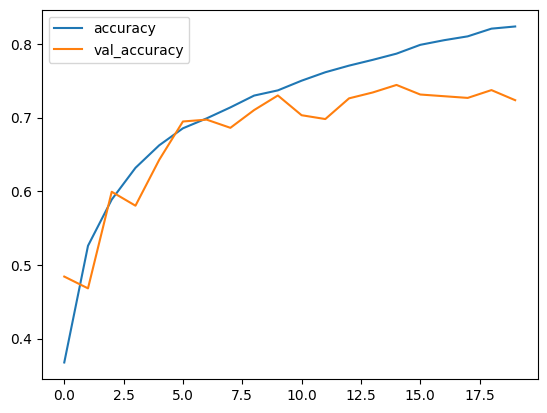

In [38]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

# Step-9 : Evaluation

In [39]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000,))

In [40]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7212 - loss: 0.8413
0.7181000113487244


In [41]:
print(test_loss)

0.8734115958213806


# Step-10 : Predictions

In [42]:
y_pred = model.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.4708765e-04, 2.8972910e-04, 7.3457765e-03, ..., 3.7328361e-03,
        3.1057247e-03, 1.8295200e-04],
       [1.0390001e-02, 9.2258327e-02, 1.1150095e-05, ..., 4.7806577e-07,
        8.9653337e-01, 7.4488425e-04],
       [6.1839636e-02, 6.3149202e-01, 5.2072336e-03, ..., 3.5869738e-04,
        2.8558740e-01, 4.6945349e-03],
       ...,
       [4.0876483e-05, 9.6044482e-07, 1.4741886e-03, ..., 2.0993208e-03,
        5.0020267e-06, 8.0900321e-07],
       [2.4275683e-02, 9.5385313e-01, 1.7352924e-03, ..., 1.3087754e-04,
        2.0827620e-05, 1.6492149e-02],
       [1.7733779e-06, 6.9284226e-08, 9.4099807e-05, ..., 9.9907899e-01,
        4.3809017e-08, 6.9856043e-07]], dtype=float32)

In [43]:
y_pred[0]

array([9.4708765e-04, 2.8972910e-04, 7.3457765e-03, 8.8402677e-01,
       4.3563478e-04, 9.8299466e-02, 1.6341251e-03, 3.7328361e-03,
       3.1057247e-03, 1.8295200e-04], dtype=float32)

In [44]:
max_prob = np.max(y_pred[0])
max_prob

np.float32(0.88402677)

In [45]:
class_names[np.argmax(y_pred[0])]

'cat'

In [46]:
max_prob = np.max(y_pred[0])
class_names[np.argmax(y_pred[0])] == class_names[y_test[0]]

True

Text(0, 0.5, 'prediction : cat')

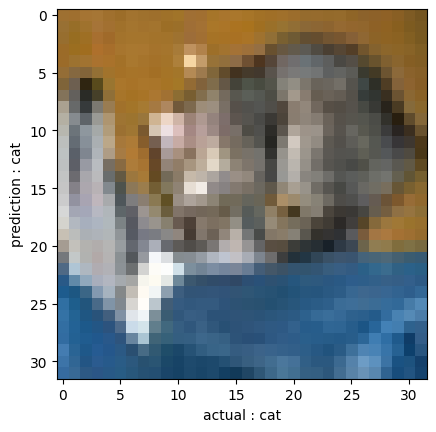

In [47]:
plt.imshow(X_test[0])
actual = class_names[y_test[0]]
predicted = class_names[np.argmax(y_pred[0])]
plt.xlabel(f'actual : {actual}')
plt.ylabel(f'prediction : {predicted}')

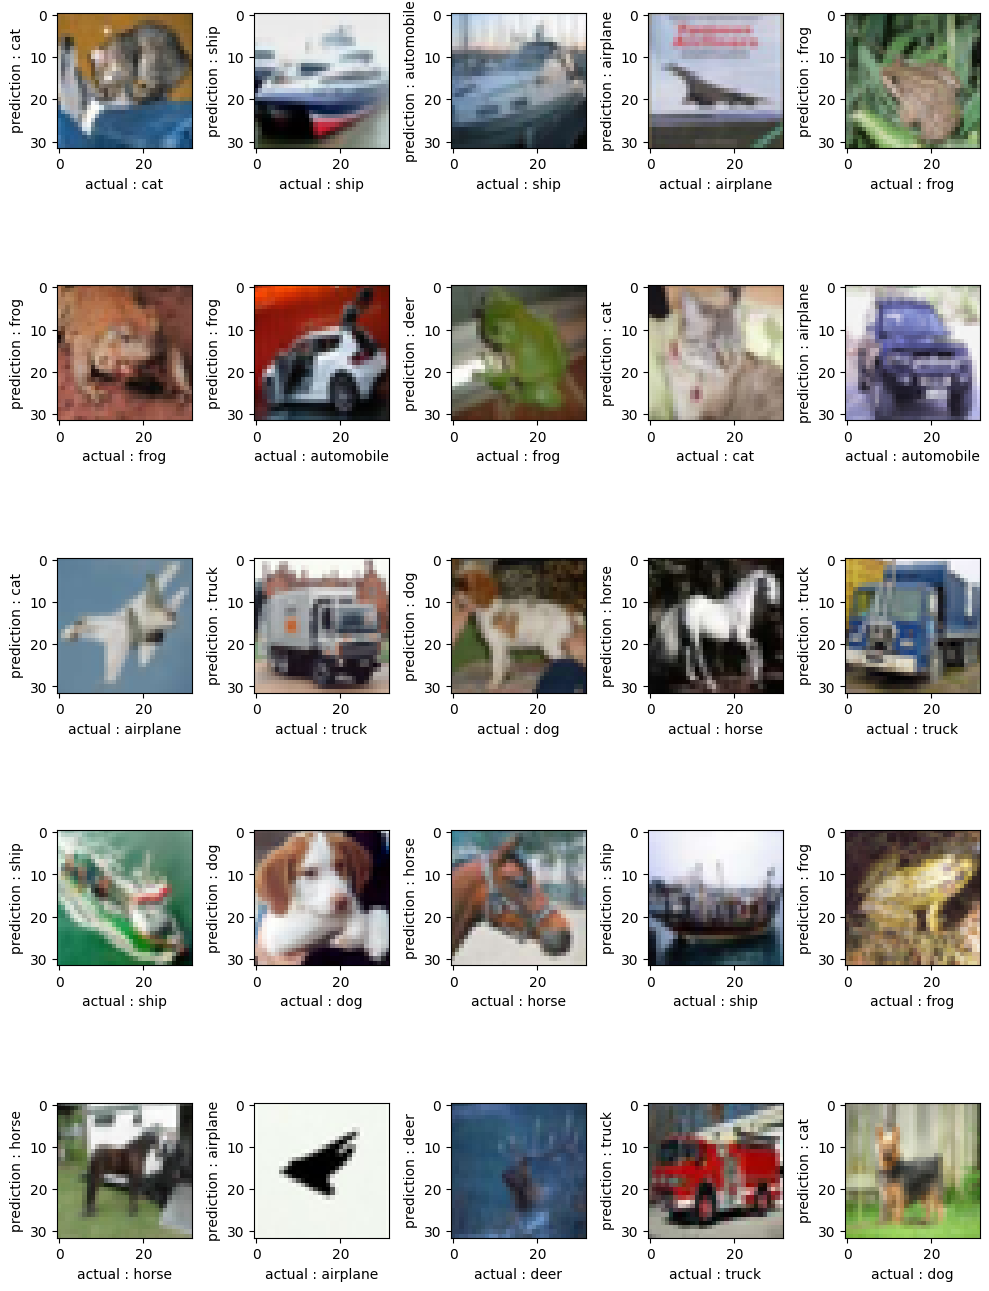

In [48]:
plt.figure(figsize=(10,14))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  actual = class_names[y_test[i]]
  predicted = class_names[np.argmax(y_pred[i])]
  plt.xlabel(f'actual : {actual}')
  plt.ylabel(f'prediction : {predicted}')
plt.tight_layout()
plt.show()

In [49]:
max_prob = [np.max(y_pred[i]) for i in range(len(y_pred))]
prediction_class = [class_names[np.argmax(y_pred[i])] for i in range(len(y_pred))]
ground_truth_class = [class_names[y_test[i]] for i in range(len(y_test))]
index = [np.argmax(i) for i in y_pred]

d1 = pd.DataFrame(zip(max_prob,index,prediction_class,ground_truth_class),
                  columns=['Max_proba','Index','Prediction_class','Ground_truth_class'])

d1

,Max_proba,Index,Prediction_class,Ground_truth_class
0,0.884027,3,cat,cat
1,0.896533,8,ship,ship
2,0.631492,1,automobile,ship
3,0.880976,0,airplane,airplane
4,0.936439,6,frog,frog
...,...,...,...,...
9995,0.575294,5,dog,ship
9996,0.782484,3,cat,cat
9997,0.905894,5,dog,dog
9998,0.953853,1,automobile,automobile


In [50]:
con = d1['Prediction_class'] == d1['Ground_truth_class']
d1['Output'] = np.where(con,1,0)
d1

,Max_proba,Index,Prediction_class,Ground_truth_class,Output
0,0.884027,3,cat,cat,1
1,0.896533,8,ship,ship,1
2,0.631492,1,automobile,ship,0
3,0.880976,0,airplane,airplane,1
4,0.936439,6,frog,frog,1
...,...,...,...,...,...
9995,0.575294,5,dog,ship,0
9996,0.782484,3,cat,cat,1
9997,0.905894,5,dog,dog,1
9998,0.953853,1,automobile,automobile,1


In [51]:
accuracy = d1['Output'].sum()/len(d1['Output'])
accuracy

np.float64(0.7181)

# Step-11 : Save the model

In [52]:
model.save('CNN_cifer10.keras')

In [53]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('CNN_cifer10.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 426,272 (1.63 MB)

 Trainable params: 142,026 (554.79 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 284,054 (1.08 MB)

# Prediction on unseen data

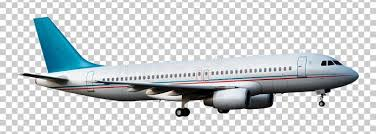

In [57]:
img = cv2.imread('/content/airplane.png')
cv2_imshow(img)

In [58]:
img.shape

(134, 376, 3)

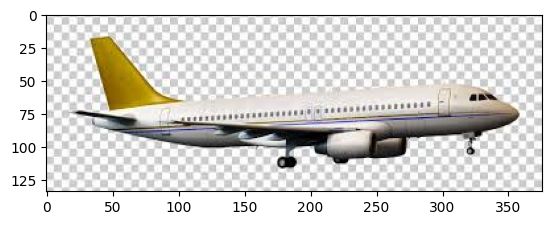

In [59]:
plt.imshow(img)

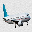

In [60]:
resized_img = cv2.resize(img, (32,32), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_img)

In [61]:
resized_img.shape

(32, 32, 3)

In [62]:
resized_img = resized_img/255

In [63]:
X_train.shape, resized_img.shape

((50000, 32, 32, 3), (32, 32, 3))

In [64]:
resized_img = resized_img.reshape(1,32,32,3)
resized_img.shape

(1, 32, 32, 3)

In [68]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 426,272 (1.63 MB)

 Trainable params: 142,026 (554.79 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 284,054 (1.08 MB)

In [69]:
np.argmax(loaded_model.predict(resized_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


np.int64(0)

In [70]:
class_names[np.argmax(loaded_model.predict(resized_img))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'airplane'